In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.lines as mlines

In [2]:
# Create random index list to make wider scatter plot
random_index = [1]*50
random_index = [random.random() for x in random_index]

In [92]:
# Set the countries to be compared and the feature by which to make comparison
feature = 'Loudness'
country_1 = 'US'
country_2 = 'Japan'

# Read the features from csv
series_1 = pd.read_csv(f'Top_50_CSVs/{country_1}_top_50_songs.csv')[feature]
series_2 = pd.read_csv(f'Top_50_CSVs/{country_2}_top_50_songs.csv')[feature]

#Create a combined series to calculate max and min y limits for graph
series_combined = pd.concat([series_1, series_2])
y_min = series_combined.min() - (0.1*series_combined.max())
y_max = series_combined.max() + (0.1*series_combined.max())

<Figure size 720x720 with 0 Axes>

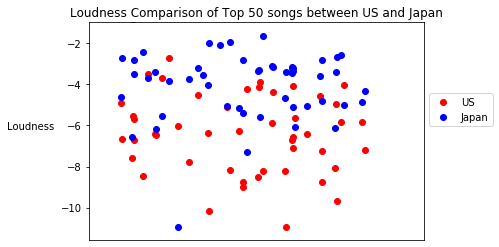

<Figure size 720x720 with 0 Axes>

In [88]:
# Make scatter plot
plt.scatter(random_index, series_1, color = 'red', label = country_1)
plt.scatter(random_index, series_2, color= 'blue', label = country_2)
plt.tick_params(axis = 'x', which = 'both', bottom =False, top = False, labelbottom = False)
plt.title(f'{feature} Comparison of Top 50 songs between {country_1} and {country_2}')
plt.ylabel(feature, rotation = 'horizontal', labelpad = 30)
plt.xlim(-.1, 1.1)
plt.ylim((y_min,y_max))
plt.legend(loc='lower left', bbox_to_anchor= (1, 0.5))
plt.figure(figsize=(10,10))

In [3]:

feature = 'Tempo'
country_1 = 'US'
country_2 = 'Japan'

#Read CSV at feature into a series. Sort values low to high
series_1 = pd.read_csv(f'Top_50_CSVs/{country_1}_top_50_songs.csv')[feature]
series_2 = pd.read_csv(f'Top_50_CSVs/{country_2}_top_50_songs.csv')[feature]
series_combined = pd.concat([series_1, series_2])
feature_max = series_combined.max()
feature_min= series_combined.min()

In [4]:
#make bins with linspace

bins = np.linspace(feature_min, feature_max, num = 10)
# Cut series with pd.cut and generate frequencies
series_1_binned = pd.cut(series_1, bins)
series_1_frequency = series_1_binned.value_counts(sort=False)
series_2_binned = pd.cut(series_2, bins)
series_2_frequency = series_2_binned.value_counts(sort=False)
frequency_combined = pd.concat([series_1_frequency, series_2_frequency])

(array([3., 6., 7., 9., 9., 7., 2., 4., 3.]),
 array([ 72.023     ,  84.56333333,  97.10366667, 109.644     ,
        122.18433333, 134.72466667, 147.265     , 159.80533333,
        172.34566667, 184.886     ]),
 <a list of 9 Patch objects>)

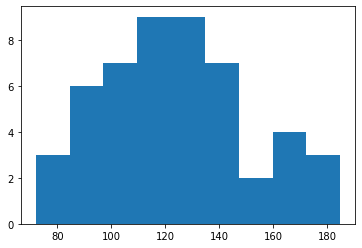

In [7]:
# This histogram is BORING and should be ASHAMED
plt.hist(series_1, bins)

Text(0.5, 1.0, 'Tempo Comparison of Top 50 songs between US and Japan')

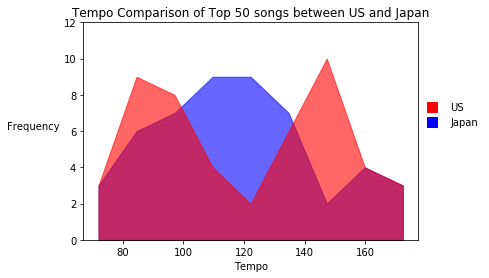

In [5]:
# I shall make a superior histogram
red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markersize=10, label= country_1)
blu_square = mlines.Line2D([], [], color='blue', marker='s', linestyle='None', markersize=10, label= country_2)
# Freqeuency plot options
fig, ax1 = plt.subplots()
ax1.plot(bins[:-1], series_1_frequency, label = country_1, color = 'blue', alpha = 0)
ax1.plot(bins[:-1], series_2_frequency, label = country_2, color = 'red', alpha = 0)
ax1.fill_between(bins[:-1], series_1_frequency, color = 'blue', alpha = 0.6)
ax1.fill_between(bins[:-1], series_2_frequency, color = 'red', alpha = 0.6)
ax1.legend(loc='lower left', handles = [red_square, blu_square], bbox_to_anchor= (1.0, 0.5), 
            borderaxespad=0, frameon=False)
ax1.set_xlabel(feature)
ax1.set_ylabel('Frequency', rotation = 'horizontal', labelpad = 30)

ax1.set_ylim(0, frequency_combined.max()*1.2)
ax1.set_title(f'{feature} Comparison of Top 50 songs between {country_1} and {country_2}')



In [5]:
def make_frequency(feature, country_1, country_2):
    #Read CSV at feature into a series. Sort values low to high
    series_1 = pd.read_csv(f'Top_50_CSVs/{country_1}_top_50_songs.csv')[feature]
    series_2 = pd.read_csv(f'Top_50_CSVs/{country_2}_top_50_songs.csv')[feature]
    series_combined = pd.concat([series_1, series_2])
    feature_min = series_combined.min()
    feature_max = series_combined.max()

    #make bins with numpy linspace
    bins = np.linspace(feature_min, feature_max, num = 10)
    
    # Cut series with pd.cut and generate frequencies
    series_1_binned = pd.cut(series_1, bins)
    series_1_frequency = series_1_binned.value_counts(sort=False)
    series_2_binned = pd.cut(series_2, bins)
    series_2_frequency = series_2_binned.value_counts(sort=False)
    
    # Created concatenated series to calculate appropriate y axis limit (frequency)
    frequency_combined = pd.concat([series_1_frequency, series_2_frequency])
    
    # Plot
    red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markersize=10, label= country_1)
    blu_square = mlines.Line2D([], [], color='blue', marker='s', linestyle='None', markersize=10, label= country_2)
    # Freqeuency plot options
    fig, ax1 = plt.subplots()
    ax1.plot(bins[:-1], series_1_frequency, label = country_1, color = 'blue', alpha = 0)
    ax1.plot(bins[:-1], series_2_frequency, label = country_2, color = 'red', alpha = 0)
    ax1.fill_between(bins[:-1], series_1_frequency, color = 'blue', alpha = 0.6)
    ax1.fill_between(bins[:-1], series_2_frequency, color = 'red', alpha = 0.6)
    ax1.legend(loc='lower left', handles = [red_square, blu_square], bbox_to_anchor= (1.0, 0.5), 
                borderaxespad=0, frameon=False, fontsize = 'large')
    ax1.set_xlabel(feature, size = 'large')
    ax1.set_ylabel('Frequency', rotation = 'horizontal', size = 'large', labelpad = 30)

    ax1.set_ylim(0, frequency_combined.max()*1.2)
    ax1.set_title(f'{feature} Comparison of Top 50 songs \nbetween {country_1} and {country_2}', pad = 10, size = 'x-large')
#     ax1.figsize()
    fig.savefig(f'figures/{feature} Comparison of Top 50 songs between {country_1} and {country_2}.jpg', bbox_inches='tight', dpi = 250)

In [48]:
# make scatter function for easy use in other files
import pandas as pd
import matplotlib.pyplot as plt
import random
def make_scatter(feature, country_1, country_2):
    # Create random index list to make wider scatter plot
    random_index = [1]*50
    random_index = [random.random() for x in random_index]
    # Set the countries to be compared and the feature by which to make comparison
    

    # Read the features from csv
    series_1 = pd.read_csv(f'Top_50_CSVs/{country_1}_top_50_songs.csv')[feature]
    series_2 = pd.read_csv(f'Top_50_CSVs/{country_2}_top_50_songs.csv')[feature]

    #Create a combined series to calculate max and min y limits for graph
    series_combined = pd.concat([series_1, series_2])
    y_min = series_combined.min() - (0.1*series_combined.max())
    y_max = series_combined.max() + (0.1*series_combined.max())

    # Make scatter plot
    plt.scatter(random_index, series_1, color = 'red', label = country_1)
    plt.scatter(random_index, series_2, color= 'blue', label = country_2)
    plt.tick_params(axis = 'x', which = 'both', bottom =False, top = False, labelbottom = False)
    plt.title(f'{feature} Comparison of Top 50 songs between {country_1} and {country_2}')
    plt.ylabel(feature, rotation = 'horizontal', labelpad = 30)
    plt.xlim(-.1, 1.1)
    plt.ylim((y_min,y_max))
    plt.legend(loc='lower left', bbox_to_anchor= (1, 0.5))
    
    plt.figure(figsize=(10,10))
    

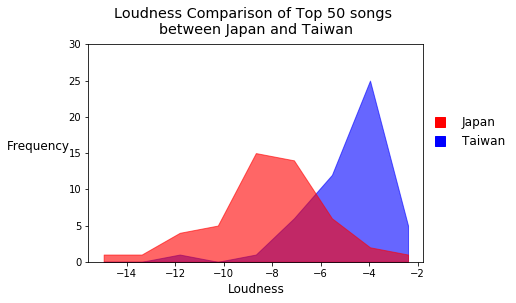

In [7]:
make_frequency(feature = 'Tem', country_1 = 'Japan', country_2 = 'Taiwan')
